In [7]:
#a
import pymc as pm
import arviz as az
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Prices.csv')

df['log_hd'] = np.log(df['HardDrive'])

x1 = df['Speed'].values
x2 = df['log_hd'].values
y = df['Price'].values

with pm.Model() as model_prices:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta1 = pm.Normal('beta1', mu=0, sigma=10)
    beta2 = pm.Normal('beta2', mu=0, sigma=10)

    sigma = pm.HalfCauchy('sigma', 5)
    mu = alpha + beta1 * x1 + beta2 * x2
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)
    idata = pm.sample(2000, return_inferencedata=True)

Output()

          mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
beta1   28.125  1.123    25.864     30.213      0.024    0.018    2146.0   
beta2  101.894  9.744    81.272    119.268      0.215    0.158    2049.0   

       ess_tail  r_hat  
beta1    2256.0    1.0  
beta2    2468.0    1.0  


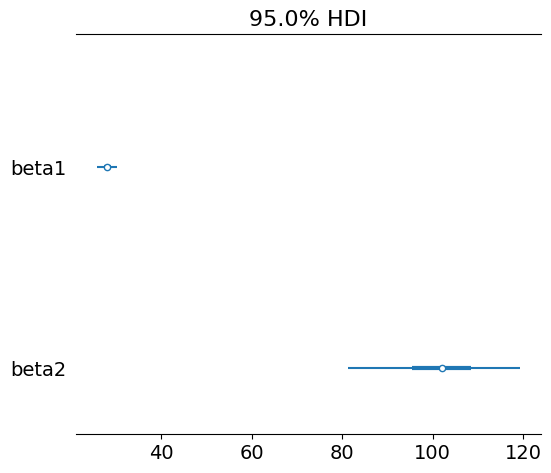

In [8]:
#b
summary = az.summary(idata, var_names=['beta1', 'beta2'], hdi_prob=0.95)
print(summary)

az.plot_forest(idata, var_names=['beta1', 'beta2'], hdi_prob=0.95, combined=True)
plt.show()

c)
Conform analizei Bayesiene, frecvența procesorului și mărimea hard disk-ului sunt predictori utili deoarece intervalele de densitate maximă (HDI) de 95% pentru coeficienții lor de regresie ($\beta_1$ și $\beta_2$) sunt strict pozitive și nu includ valoarea 01111.Acest lucru indică, cu o probabilitate de 95%, că există o relație semnificativă între aceste variabile și prețul de vânzare (ambele influențează prețul pozitiv).

In [9]:
#d
posterior = idata.posterior.stack(samples={"chain", "draw"})

alpha_samples = posterior['alpha'].values
beta1_samples = posterior['beta1'].values
beta2_samples = posterior['beta2'].values

x1_new = 33
x2_new = np.log(540)

mu_new_samples = alpha_samples + beta1_samples * x1_new + beta2_samples * x2_new

hdi_mu = az.hdi(mu_new_samples, hdi_prob=0.90)

print(f"Prețul așteptat (media) estimat: {mu_new_samples.mean():.2f}")
print(f"Interval HDI 90% pentru media prețului: {hdi_mu}")

Prețul așteptat (media) estimat: 1586.57
Interval HDI 90% pentru media prețului: [1532.24568847 1645.0053252 ]


In [11]:
#e
sigma_samples = posterior['sigma'].values
y_pred_samples = np.random.normal(loc=mu_new_samples, scale=sigma_samples)
hdi_y_pred = az.hdi(y_pred_samples, hdi_prob=0.90)

print(f"Interval HDI 90% pentru prețul prezis (un singur PC): {hdi_y_pred}")

Interval HDI 90% pentru prețul prezis (un singur PC): [ 489.36946481 2768.24061184]


Output()

         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
beta3  12.299  9.764    -7.561     30.132      0.157     0.15    3870.0   

       ess_tail  r_hat  
beta3    2446.0    1.0  


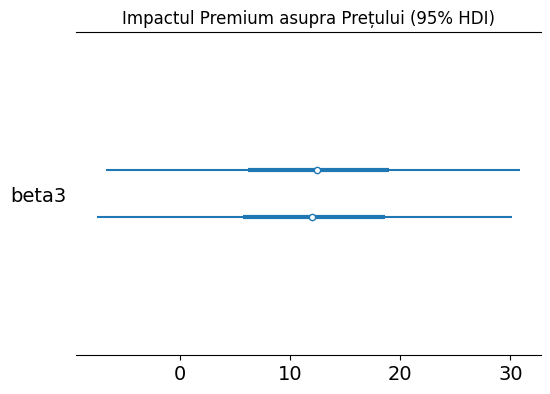

In [13]:
#bonus
df['premium_numeric'] = df['Premium'].apply(lambda x: 1 if x == 'yes' else 0)
x3 = df['premium_numeric'].values

with pm.Model() as model_bonus:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta1 = pm.Normal('beta1', mu=0, sigma=10)
    beta2 = pm.Normal('beta2', mu=0, sigma=10)
    beta3 = pm.Normal('beta3', mu=0, sigma=10)

    sigma = pm.HalfCauchy('sigma', 5)
    mu = alpha + beta1 * x1 + beta2 * x2 + beta3 * x3
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)
    idata_bonus = pm.sample(2000, return_inferencedata=True, progressbar=True)

summary_bonus = az.summary(idata_bonus, var_names=['beta3'], hdi_prob=0.95)
print(summary_bonus)

az.plot_forest(idata_bonus, var_names=['beta3'], hdi_prob=0.95)
plt.title("Impactul Premium asupra Prețului (95% HDI)")
plt.show()

In [3]:
from google.colab import files

uploaded = files.upload()

Saving Prices.csv to Prices (1).csv
